In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!ls /content/drive/MyDrive/CV\ project/data/image

ls: cannot access '/content/drive/MyDrive/CV project/data/image': No such file or directory


In [ ]:
 #!7za -y x "/content/drive/MyDrive/CV project/data/image/origin.7z.*"

In [ ]:
 #!cp -r ./origin "/content/drive/MyDrive/CV project"

In [ ]:
import numpy as np
import os
import glob
import pandas as pd
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [ ]:
images_folder_path=r"/content/drive/MyDrive/Colab Notebooks/processed_data/origin"
label_file_path=r"/content/drive/MyDrive/data/label/label.lst"


In [ ]:
from numpy import split
import pandas as pd
df_info = pd.read_csv(label_file_path,sep=" ",header=None)
col_names="image_name face_id_in_image face_box_top face_box_left face_box_right face_box_bottom face_box_cofidence expression_label".split()
df_info.columns = col_names

df_info.head()

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0


In [ ]:
df_sel=df_info[df_info.face_box_cofidence>30]

In [ ]:
df_sel.shape

(69405, 8)

Graph is Optional it is just to visualize the data

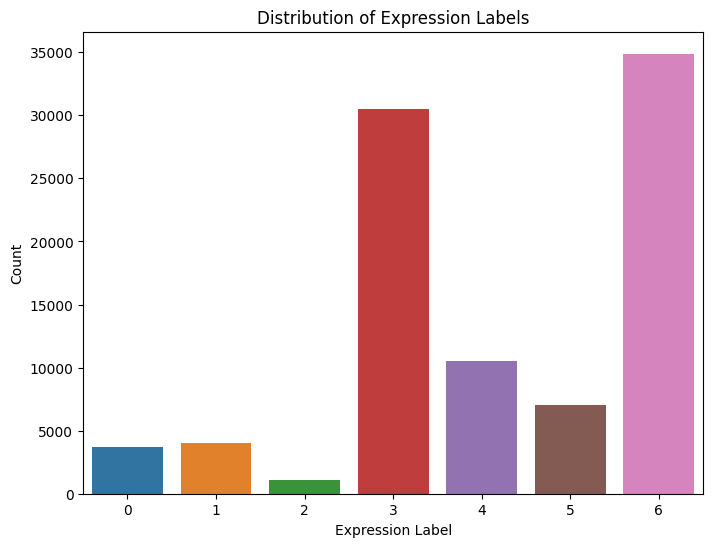

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a bar chart for expression labels
plt.figure(figsize=(8, 6))
sns.countplot(x='expression_label', data=df_info)
plt.xlabel('Expression Label')
plt.ylabel('Count')
plt.title('Distribution of Expression Labels')
plt.show()


In [ ]:
from numpy.core.fromnumeric import resize
import cv2
import matplotlib.pyplot as plt
import os
x = []
y = []
for i, row in df_sel.sample(100).iterrows():
    img_name = row["image_name"]
    x1 = row["face_box_left"]
    x2 = row["face_box_right"]
    y1 = row["face_box_top"]
    y2 = row["face_box_bottom"]
    label = row["expression_label"]
    img_path = os.path.join(images_folder_path, img_name)
    img = cv2.imread(img_path)
    # Check if img is not None
    if img is not None:
    #     # Crop the image using the provided coordinates
         cropped_img = img[y1:y2, x1:x2]
    else:
        continue

    if cropped_img is not None:
      resized_face = cv2.resize(cropped_img , ( 64,64))
    else:
      continue

    x.append(resized_face)
    y.append(label)

In [ ]:
import numpy as np
X=np.array(x)
Y=np.array(y)

In [ ]:
X

array([[[[229, 250, 227],
         [230, 250, 227],
         [233, 253, 230],
         ...,
         [223, 244, 222],
         [221, 242, 220],
         [221, 242, 220]],

        [[228, 248, 225],
         [229, 249, 225],
         [229, 249, 226],
         ...,
         [223, 244, 222],
         [221, 242, 220],
         [220, 242, 220]],

        [[226, 248, 224],
         [229, 251, 227],
         [228, 250, 226],
         ...,
         [222, 243, 221],
         [220, 241, 219],
         [220, 241, 219]],

        ...,

        [[138, 170, 196],
         [128, 166, 192],
         [127, 168, 192],
         ...,
         [ 70,  66,   6],
         [ 99,  94,  11],
         [134, 127,  27]],

        [[143, 172, 196],
         [136, 173, 196],
         [126, 169, 190],
         ...,
         [ 70,  66,  12],
         [ 88,  84,   6],
         [118, 113,  14]],

        [[144, 173, 195],
         [139, 174, 197],
         [128, 169, 190],
         ...,
         [ 80,  71,  22],
        

In [ ]:
Y

array([6, 3, 4, 3, 3, 3, 6, 0, 1, 6, 3, 3, 6, 6, 4, 3, 6, 3, 1, 0, 6, 3,
       3, 4, 3, 3, 4, 6, 6, 4, 6, 3, 6, 3, 6, 6, 3, 3, 3, 5, 1, 3, 5, 3,
       1, 3, 3, 6, 6])

In [ ]:
len(X)

49

In [ ]:
len(Y)

49

In [ ]:
X.shape

(49, 64, 64, 3)

In [ ]:
Y.shape

(49,)

In [ ]:
normalized_X = X / 255.0

In [ ]:
normalized_X

array([[[[0.89803922, 0.98039216, 0.89019608],
         [0.90196078, 0.98039216, 0.89019608],
         [0.91372549, 0.99215686, 0.90196078],
         ...,
         [0.8745098 , 0.95686275, 0.87058824],
         [0.86666667, 0.94901961, 0.8627451 ],
         [0.86666667, 0.94901961, 0.8627451 ]],

        [[0.89411765, 0.97254902, 0.88235294],
         [0.89803922, 0.97647059, 0.88235294],
         [0.89803922, 0.97647059, 0.88627451],
         ...,
         [0.8745098 , 0.95686275, 0.87058824],
         [0.86666667, 0.94901961, 0.8627451 ],
         [0.8627451 , 0.94901961, 0.8627451 ]],

        [[0.88627451, 0.97254902, 0.87843137],
         [0.89803922, 0.98431373, 0.89019608],
         [0.89411765, 0.98039216, 0.88627451],
         ...,
         [0.87058824, 0.95294118, 0.86666667],
         [0.8627451 , 0.94509804, 0.85882353],
         [0.8627451 , 0.94509804, 0.85882353]],

        ...,

        [[0.54117647, 0.66666667, 0.76862745],
         [0.50196078, 0.65098039, 0.75294118]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'x' is your input features and 'y' is the corresponding target labels
# Replace these with your actual data arrays

# Split the data into training (70%), testing (15%), and validation (15%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Display the sizes of each split
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 34
Validation set size: 7
Testing set size: 8


In [ ]:
from keras.utils import to_categorical

# Assuming Y_train contains integer class labels ranging from 0 to 6
Y_train_one_hot = to_categorical(Y_train, num_classes=7)
Y_val_one_hot = to_categorical(Y_val, num_classes=7)


In [ ]:
X_train.shape

(34, 64, 64, 3)

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Assuming 'x_train' is your training data and 'y_train' are the corresponding labels
# Replace these with your actual training data and labels

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Random shear
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest'     # Fill mode for newly created pixels
)

# Fit the ImageDataGenerator on the training data
datagen.fit(X_train)

# Generate augmented data batches
augmented_data_generator = datagen.flow(X_train, Y_train, batch_size=32)

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# Assuming 'X_train', 'Y_train', 'X_val', and 'Y_val' are your training data and labels, respectively
# Replace these with your actual training data and labels

# One-hot encode the target labels
Y_train_one_hot = to_categorical(Y_train, num_classes=7)
Y_val_one_hot = to_categorical(Y_val, num_classes=7)

# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)
# Compile the model
emotion_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary for debugging
emotion_model.summary()


# Create an ImageDataGenerator instance with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Fit the ImageDataGenerator on your training data
datagen.fit(X_train)

# Train the model using the augmented data
#history = model.fit(datagen.flow(X_train, Y_train, batch_size=32),
#epochs=100,
                    #validation_data=(X_val, Y_val))


# Train the model
history = emotion_model.fit(X_train, Y_train_one_hot, epochs=100, batch_size=32, validation_data=(X_val, Y_val_one_hot))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                    